# The Treatment Options and Prognosis of Brain Metastases
- By Freatink
- 2018.09

![Brain Metastases](brain.jpg)

## 1. Business Understanding: What is brain metastases?

**Brain metastases** means the situation that someone has a kind of systme tumor, such as lung cancer, breast cancer,bladder cancer and so on. The tumor must be malignent, and the primary tumor can be transformed into our central nervous system(CNS). If your brain is invaded by cancer from other systems, brain metastases will be formed and cause bad prognosis.To understand the main character of brain metastases and to choose the most suitable treatment are extramely important for these patients.

There are some questions that you may get interested: 

> 1. what are the main characters of brain metastases? The ages at which people should get caustion of it? Among many primary tumors, which is the most possible responsible one.
> 2. How long can a people live with brain metastases?
> 3. How to choose the most suitable treatment?

## 2. Data Understanding

To find out the main character of brain metastases and the treatment choises, I collected 90 patients' clinical data from a hospital in north part of China. I restore these data in brain_metastasis_data.csv. In this section, I will load it into dataframe and do some exploration.

In [2]:
# import essential packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
#load the data
raw_data = pd.read_csv('brain_metastasis_data.csv')

In [4]:
#load the description 
description = pd.read_csv('description.csv')

In [5]:
# glacne over the data
raw_data.head()

,id,age,gender,primary_site,tumor_amount_supratentorial,tumor_amount_subtentorial,duration,KPS,survival,OS,primary tumor control,treatment,size,metastasis other than CNS
0,1,76,1,1,1,0,0,1,1,5.0,2,COP+WBRT+CT,2,2
1,2,64,1,1,1,2,6,1,2,4.0,2,CT,1,1
2,3,31,1,1,2,0,0,1,2,14.0,2,COP+SRS,2,1
3,4,62,2,1,1,0,0,1,1,12.0,1,COP+SRS,2,2
4,5,68,2,1,0,2,47,1,2,5.0,1,WBRT+CT,1,2


- When you look at the dataframe above, you may find that almost all of the colunms are marked by some numbers and some columns are quite difficult to understand. That is because the data was exported from SPSS software. I made the description dataframe for the readers, as you can find all the explanations in the description text if you want.

In [6]:
# glance over the description
description

,id,The index of the patients.
0,age,The age of the patients.
1,gender,"1 represents male, 2 represents female."
2,primary_site,"the primary lesion of the tumor：1: 'lung', 2: ..."
3,tumor_amount_supratentorial,The amount of tumors in the supratentorial reg...
4,tumor_amount_subtentorial,The amount of tumors in the subtentorial region.
5,duration,The duration between the primary lesion and th...
6,KPS,"1 represents KPS score ≥70, 0 reprensents KPS ..."
7,survival,"1 represents alive, 2 represents dead, 3 repre..."
8,primary tumor control,"1 represents primary tumor is controlled well,..."
9,treatment,"COP means conplete tumor resection, SRS means ..."


 As you can see from the description, the data contains 12 columns of useful information including:

> 1. the patients' age
> 2. the patients' gender
> 3. the primary tumor: remeber metastases is caused by primary tumors
> 4. the tumor amount in the supratentorial region: our endbrain is located in the supratentorial region
> 5. the tumor amount in the subtentorial region: the brain stem and the cerebellum are located in the subtentorial region
> 6. the time duration between the primary tumor and the brain metastasis
> 7. survival: At the time when our researchers try to contact with the patients, they may have been dead already. But some of the patients may still be alive. We may lose touch with some patients as well,
> 8. KPS score: KPS score is the most frequently-used scoring system. If KPS >= 70, the patients can basically take care of themselves without others' help.
> 9. primary tuomr control: whether the primary tumor is undercontrol and cured or not.
> 10. teatment: the treatment the patients had choosen.
> 11. size: the brain metastasis tumor size.
> 12. metastasis other than CNS: is there any other tumor lesion in other systems beside central nervous system.

Here is the anatomy picture showing where is the supra- and sub- tentorial region:


![Anatomy](anatomy.jpg)

## 3. Prepare Data

First, let's reset the index and do some exploration to get some general information.

In [7]:
#make the column id as the new index
data = raw_data.set_index(['id'])

In [8]:
#create a new column that counts the total tumor amount.
data['total_tumor_amount'] = data['tumor_amount_supratentorial'] + data['tumor_amount_subtentorial']

In [9]:
#creat a new column that can label whether the intracranial tumor is single or multiple.
data['is_single'] = '_'
for index, row in data.iterrows():
            if row['total_tumor_amount'] == 1:
                data.loc[index,['is_single']] = 'single'
            else:
                data.loc[index,['is_single']] = 'multiple'

In [10]:
# check the data
data.head()

,age,gender,primary_site,tumor_amount_supratentorial,tumor_amount_subtentorial,duration,KPS,survival,OS,primary tumor control,treatment,size,metastasis other than CNS,total_tumor_amount,is_single
id,,,,,,,,,,,,,,,
1,76,1,1,1,0,0,1,1,5.0,2,COP+WBRT+CT,2,2,1,single
2,64,1,1,1,2,6,1,2,4.0,2,CT,1,1,3,multiple
3,31,1,1,2,0,0,1,2,14.0,2,COP+SRS,2,1,2,multiple
4,62,2,1,1,0,0,1,1,12.0,1,COP+SRS,2,2,1,single
5,68,2,1,0,2,47,1,2,5.0,1,WBRT+CT,1,2,2,multiple


In [11]:
# To have a look at the general type and information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 1 to 90
Data columns (total 15 columns):
age                            90 non-null int64
gender                         90 non-null int64
primary_site                   90 non-null int64
tumor_amount_supratentorial    90 non-null int64
tumor_amount_subtentorial      90 non-null int64
duration                       90 non-null int64
KPS                            90 non-null int64
survival                       90 non-null int64
OS                             90 non-null float64
primary tumor control          90 non-null int64
treatment                      90 non-null object
size                           90 non-null int64
metastasis other than CNS      90 non-null int64
total_tumor_amount             90 non-null int64
is_single                      90 non-null object
dtypes: float64(1), int64(12), object(2)
memory usage: 13.8+ KB


In [12]:
#To check the missing value in the data. As you can see, there is no missing value in the dataframe.
data.isnull().sum()

age                            0
gender                         0
primary_site                   0
tumor_amount_supratentorial    0
tumor_amount_subtentorial      0
duration                       0
KPS                            0
survival                       0
OS                             0
primary tumor control          0
treatment                      0
size                           0
metastasis other than CNS      0
total_tumor_amount             0
is_single                      0
dtype: int64

- As the data was exported form SPSS, all of the categorical variables are labeled by intergers. I want to change them back to categorical variables and make them labeled by the real meaning according to the description dataframe.

In [13]:
# Define a function that take an index and dictionary as input. Replace the number with the correspending label in the index columns in data.
def to_categorical(index,dict):
    data[index] = data[index].replace(dict)

In [14]:
# Define a dictionary that carries the index and the corresponding dictionary.
labels = [('gender',{1: 'male', 2: 'female'}),('primary_site',{1: 'lung', 2: 'breast', 3: 'kidney', 4: 'rectum', 5: 'colon', 6: 'lymphoma', 7: 'others'}),
          ('KPS', {1: '>= 70', 2: '<70'}),('survival',{1: 'alive', 2: 'dead' }),('primary tumor control',{1: 'controled', 2:'uncontroled'}),('size',{1: '<3cm', 2: '>=3cm'}),
          ('metastasis other than CNS',{1: 'yes', 2:'no'})]

In [15]:
#Implement the change.
for item in labels:
    to_categorical(item[0], item[1])

In [16]:
#Recheck the data
data.head(5)

,age,gender,primary_site,tumor_amount_supratentorial,tumor_amount_subtentorial,duration,KPS,survival,OS,primary tumor control,treatment,size,metastasis other than CNS,total_tumor_amount,is_single
id,,,,,,,,,,,,,,,
1,76,male,lung,1,0,0,>= 70,alive,5.0,uncontroled,COP+WBRT+CT,>=3cm,no,1,single
2,64,male,lung,1,2,6,>= 70,dead,4.0,uncontroled,CT,<3cm,yes,3,multiple
3,31,male,lung,2,0,0,>= 70,dead,14.0,uncontroled,COP+SRS,>=3cm,yes,2,multiple
4,62,female,lung,1,0,0,>= 70,alive,12.0,controled,COP+SRS,>=3cm,no,1,single
5,68,female,lung,0,2,47,>= 70,dead,5.0,controled,WBRT+CT,<3cm,no,2,multiple


- While the column "treatment" contains a varity of different treatment, we need to seperate them independently.

In [17]:
# Define a function that creates one column for each treatment, fill "yes" or "no" as the corresponding value.
def classify_treatment(treatments):
    for treatment in treatments:
        data[treatment] = 'placeholder'
        for index, row in data.iterrows():
            if treatment in row['treatment']:
                data.loc[index,[treatment]] = 'yes'
            else:
                data.loc[index,[treatment]] = 'no'

In [18]:
# Inplement the change.
classify_treatment(('COP','WBRT','CT','SRS','POP'))

In [19]:
# Recheck the data
data.head() 

,age,gender,primary_site,tumor_amount_supratentorial,tumor_amount_subtentorial,duration,KPS,survival,OS,primary tumor control,treatment,size,metastasis other than CNS,total_tumor_amount,is_single,COP,WBRT,CT,SRS,POP
id,,,,,,,,,,,,,,,,,,,,
1,76,male,lung,1,0,0,>= 70,alive,5.0,uncontroled,COP+WBRT+CT,>=3cm,no,1,single,yes,yes,yes,no,no
2,64,male,lung,1,2,6,>= 70,dead,4.0,uncontroled,CT,<3cm,yes,3,multiple,no,no,yes,no,no
3,31,male,lung,2,0,0,>= 70,dead,14.0,uncontroled,COP+SRS,>=3cm,yes,2,multiple,yes,no,no,yes,no
4,62,female,lung,1,0,0,>= 70,alive,12.0,controled,COP+SRS,>=3cm,no,1,single,yes,no,no,yes,no
5,68,female,lung,0,2,47,>= 70,dead,5.0,controled,WBRT+CT,<3cm,no,2,multiple,no,yes,yes,no,no


- To find out the relationship between risk factors and overall survival time, I would like to remove the alive patients' data, and set dummy variables for gender，primary_site, KPS score, primary tumor control,and treatments.

In [20]:
#Create another dataframe 'data_dead' to restore the patients who had been already dead.
data_dead = data[data['survival'] == 'dead']

In [21]:
# Delete the column 'surevival', because all of the patients were dead.
del data_dead['survival']

In [22]:
# In order to build a model to see the correlation between factors and to predict the prognosis, I change the categorical variables back to number.
num_labels = [('gender',{ 'male': 1,'female': 0}),('KPS', { '>= 70': 1,  '<70': 0}),('primary tumor control',{ 'controled':1, 'uncontroled':0}),('size',{'<3cm':0, '>=3cm':1}),
          ('metastasis other than CNS',{ 'yes':1, 'no':0}),('is_single',{'single':1, 'multiple':0}),('COP',{'yes':1, 'no':0}),('WBRT',{'yes':1, 'no':0}),('CT',{'yes':1, 'no':0}),('SRS',{'yes':1, 'no':0}),('POP',{'yes':1, 'no':0})]

In [23]:
# Inplement the change.
for item in num_labels:
    data_dead[item[0]] = data[item[0]].replace(item[1])

C:\Users\freat\AppData\Local\conda\conda\envs\dog-project\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [24]:
# As the column of 'treatment' has already been labeled by seperate colunms, we delete it.
del data_dead['treatment']

In [25]:
#Recheck the data.
data_dead.head()

,age,gender,primary_site,tumor_amount_supratentorial,tumor_amount_subtentorial,duration,KPS,OS,primary tumor control,size,metastasis other than CNS,total_tumor_amount,is_single,COP,WBRT,CT,SRS,POP
id,,,,,,,,,,,,,,,,,,
2,64,1,lung,1,2,6,1,4.0,0,0,1,3,0,0,0,1,0,0
3,31,1,lung,2,0,0,1,14.0,0,1,1,2,0,1,0,0,1,0
5,68,0,lung,0,2,47,1,5.0,1,0,0,2,0,0,1,1,0,0
6,54,1,lung,1,0,0,0,0.5,0,0,0,1,1,0,0,0,0,0
8,70,0,lung,3,0,18,1,2.0,0,0,0,3,0,0,0,0,0,0


In [26]:
# Get dummy variables for primary site.
dummies = pd.get_dummies(data_dead['primary_site'])

In [27]:
# Merge these two dataframe together.
data_dead = pd.merge(data_dead, dummies, how='left', on='id')

In [28]:
# delete the primary site column.
del data_dead['primary_site']

In [29]:
# Create a new column called 'age_group' which seperate the patients with age greater than 65 years apart.
data_dead['age_group'] = '_'
for index, row in data_dead.iterrows():
            if row['age'] < 65:
                data_dead.loc[index,['age_group']] = 0
            else:
                data_dead.loc[index,['age_group']] = 1

In [30]:
# Delete the age column.
del data_dead['age']

In [31]:
# Recheck the data.
data_dead.head()

,gender,tumor_amount_supratentorial,tumor_amount_subtentorial,duration,KPS,OS,primary tumor control,size,metastasis other than CNS,total_tumor_amount,...,SRS,POP,breast,colon,kidney,lung,lymphoma,others,rectum,age_group
id,,,,,,,,,,,,,,,,,,,,,
2,1,1,2,6,1,4.0,0,0,1,3,...,0,0,0,0,0,1,0,0,0,0
3,1,2,0,0,1,14.0,0,1,1,2,...,1,0,0,0,0,1,0,0,0,0
5,0,0,2,47,1,5.0,1,0,0,2,...,0,0,0,0,0,1,0,0,0,1
6,1,1,0,0,0,0.5,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8,0,3,0,18,1,2.0,0,0,0,3,...,0,0,0,0,0,1,0,0,0,1


## 4.  Model Data

In this section, I will try to analysis our data, and try to answer some questions.

#### Question 1: What can be found through the basic character of brain metastases?

- Distribution of Age at the onset of the disease

In [32]:
raw_data['age'].describe()

count    90.000000
mean     61.544444
std      13.819186
min      26.000000
25%      54.000000
50%      64.000000
75%      71.750000
max      88.000000
Name: age, dtype: float64

Text(0.5,1,'Distribution of Age at the onset of the disease')

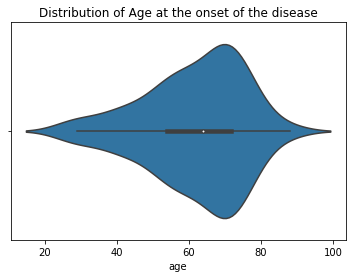

In [33]:
sns.violinplot(x=data["age"],data=data) 
plt.title('Distribution of Age at the onset of the disease')

<u> ** From this we know that the median age at which the disease occur is 61.5. We should pay attention to this disease after 55 years old.**  </u>

- Gender distribution.

Text(0.5,1,'Gender distribution')

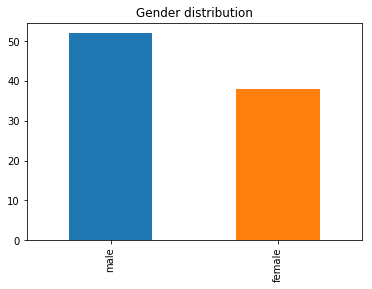

In [34]:
data.gender.value_counts().plot(kind = 'bar')
plt.title('Gender distribution')

<u> **Male individuals is relatively more than female.**</u>

- Primary tumor distribution.

Text(0.5,1,'Primary tumor distribution')

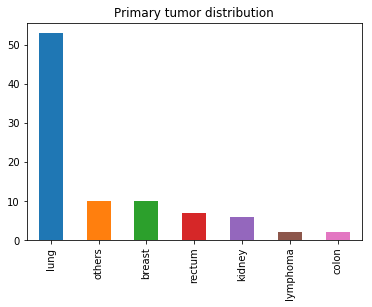

In [35]:
data.primary_site.value_counts().plot(kind = 'bar')
plt.title('Primary tumor distribution')

<u>**Nearly 60% of brain metastases is caused by lung cancer!**</u>

- How long dose the primary tumor need to generate brain metastasis?

In [36]:
data['duration'].describe()

count     90.000000
mean      15.166667
std       23.044778
min        0.000000
25%        0.000000
50%        6.000000
75%       23.000000
max      118.000000
Name: duration, dtype: float64

(array([57., 11.,  8.,  6.,  2.,  1.,  3.,  1.,  0.,  1.]),
 array([  0. ,  11.8,  23.6,  35.4,  47.2,  59. ,  70.8,  82.6,  94.4,
        106.2, 118. ]),
 <a list of 10 Patch objects>)

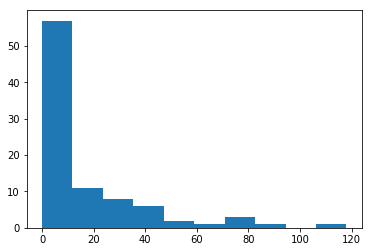

In [37]:
plt.hist(data['duration'])

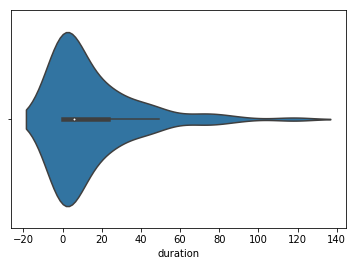

In [38]:
sns.violinplot(x=data['duration'],data=data)

Text(0.5,1,'Different duration grouped by different primary site')

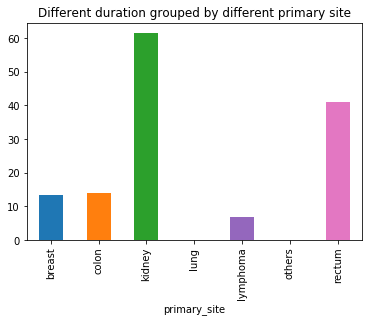

In [39]:
data.groupby('primary_site')['duration'].median().plot(kind='bar')
plt.title('Different duration grouped by different primary site')

<u>**Surprisingly, the median duration a tumor need to generate a brain metastasis is only 15 months. There is a large number of patients whose duration is 0, which means that they even don't know they've got a system tumor before they found the brain metastasis.The lung carcinoma is quite easy to cause brain metastases by a vary short period of time!**</u>

- Dose brain metastasis tend to be singel or multiple?

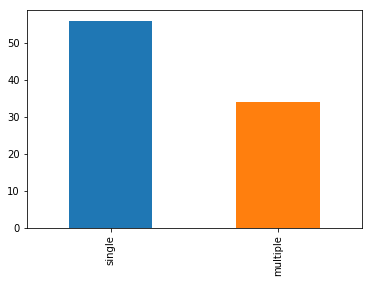

In [40]:
data.is_single.value_counts().plot(kind = 'bar')

<u>**Here, we can see that although most brain metastases are single, there is still a large portion of metastases are multiple. This is a big difference from the primayr malignent tumor in the CNS systme(such as gliomas).**</u>

- How about the size of the tumor?

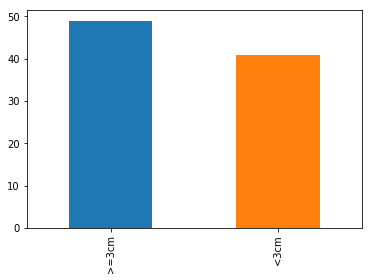

In [41]:
data['size'].value_counts().plot(kind='bar')

Although we haven't found any obvious difference of the tumor size, but actually I have to tell you that most of the tumor located in brain is larger than 3 cm, because the tumor has to be big enough to increase the intracranial pressure and cause symptoms.The edema around the metastic lessions is often more severe than the primary CNS tumor. That's why so many small lession can also be noticed and found.

- How about the quality of life when the onset of the disease?

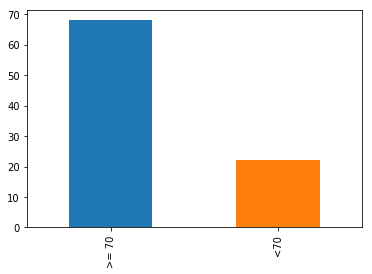

In [42]:
data['KPS'].value_counts().plot(kind='bar')

<U>**Altough brain metastasis is a disastrous disease, most people can take care of themselves independently at the initial period of the time. **</U>

- How long can a patient live after the onset of brain metastasis.

Notice that some patients were still alive when we collected these data, they would live longer than we recorded.So we need to remove the alive-data, to make sure that every overall survival time is correct.

In [43]:
data_dead.OS.describe()

count    70.000000
mean      8.102857
std       7.837276
min       0.200000
25%       2.000000
50%       5.500000
75%      12.000000
max      36.000000
Name: OS, dtype: float64

(array([26., 16.,  4., 13.,  3.,  3.,  3.,  0.,  1.,  1.]),
 array([ 0.2 ,  3.78,  7.36, 10.94, 14.52, 18.1 , 21.68, 25.26, 28.84,
        32.42, 36.  ]),
 <a list of 10 Patch objects>)

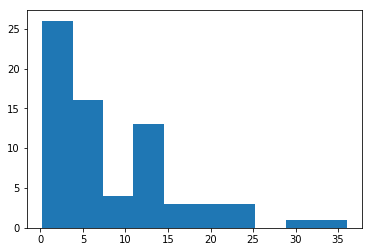

In [44]:
plt.hist(data_dead.OS)

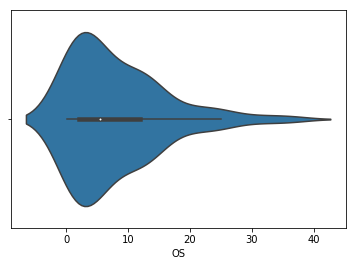

In [46]:
sns.violinplot(x=data_dead.OS, data=data_dead)

<u>**The prognosis of brain metastasis is extremely poor for most patient can't live longer than 1 year. The median survival time is only 5.5 months!**</u>

#### Question 2: which factors can affect the prognosis of brain metastases patients?
- To anwser this question, we need to find the correlation between the risk factors and find out which factors are strongly associated with overall survival time.

In [47]:
data_dead.corr()

,gender,tumor_amount_supratentorial,tumor_amount_subtentorial,duration,KPS,OS,primary tumor control,size,metastasis other than CNS,total_tumor_amount,...,SRS,POP,breast,colon,kidney,lung,lymphoma,others,rectum,age_group
gender,1.000000,2.635561e-02,-0.039567,0.015703,-0.176335,-0.068732,-2.541643e-02,0.097628,-0.120700,-0.007351,...,0.015899,0.032949,-4.206599e-01,-0.040266,-8.139772e-03,0.203331,-0.040266,-2.934836e-02,0.166307,0.025416
tumor_amount_supratentorial,0.026356,1.000000e+00,-0.085462,-0.144606,0.266942,-0.127546,-9.332565e-02,-0.175118,-0.030993,0.714812,...,0.081082,0.146647,-1.329346e-17,-0.061604,1.095898e-01,-0.015554,-0.061604,1.197369e-01,-0.119737,-0.015554
tumor_amount_subtentorial,-0.039567,-8.546176e-02,1.000000,-0.088321,0.018809,-0.229255,-8.585035e-02,-0.163745,0.019387,0.635669,...,-0.205265,-0.016188,9.252269e-02,0.030602,-1.429694e-01,0.165977,-0.088405,-1.057402e-01,-0.105740,-0.114467
duration,0.015703,-1.446060e-01,-0.088321,1.000000,-0.039488,0.121137,5.279260e-01,0.263616,0.188522,-0.174031,...,0.021544,-0.023933,-6.316184e-02,0.001121,4.556679e-01,-0.392958,-0.059888,-8.978178e-02,0.442617,0.152782
KPS,-0.176335,2.669421e-01,0.018809,-0.039488,1.000000,0.407857,-2.738613e-02,-0.136027,0.054568,0.220027,...,0.323589,0.080687,1.054093e-01,0.108465,1.754116e-01,-0.036515,0.108465,-1.054093e-01,-0.210819,-0.100416
OS,-0.068732,-1.275460e-01,-0.229255,0.121137,0.407857,1.000000,3.294971e-01,0.050828,0.072117,-0.259733,...,0.603513,-0.020443,1.485897e-01,-0.013287,1.460390e-01,-0.066461,-0.156550,3.108879e-02,-0.101100,-0.250104
primary tumor control,-0.025416,-9.332565e-02,-0.085850,0.527926,-0.027386,0.329497,1.000000e+00,0.273185,0.215859,-0.132565,...,0.225891,-0.058926,3.849002e-01,0.024754,3.202563e-01,-0.533333,-0.148522,-8.546501e-17,0.288675,-0.241667
size,0.097628,-1.751182e-01,-0.163745,0.263616,-0.136027,0.050828,2.731848e-01,1.000000,0.356290,-0.250611,...,-0.182972,0.076098,1.911798e-02,0.157378,3.181424e-02,-0.273185,-0.014754,1.911798e-02,0.305888,0.016557
metastasis other than CNS,-0.120700,-3.099255e-02,0.019387,0.188522,0.054568,0.072117,2.158587e-01,0.356290,1.000000,-0.010406,...,0.022505,-0.067512,1.821458e-01,0.192359,1.994138e-01,-0.157743,-0.152901,-2.013191e-01,0.086280,0.074720
total_tumor_amount,-0.007351,7.148124e-01,0.635669,-0.174031,0.220027,-0.259733,-1.325654e-01,-0.250611,-0.010406,1.000000,...,-0.081250,0.102260,6.494021e-02,-0.026252,-1.543815e-02,0.104445,-0.109781,1.855434e-02,-0.166989,-0.092394


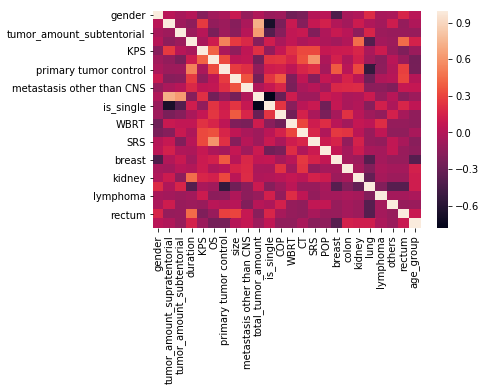

In [48]:
#Plot a heatmap according to the correlation coefficient matrix above.
sns.heatmap(data_dead.corr())

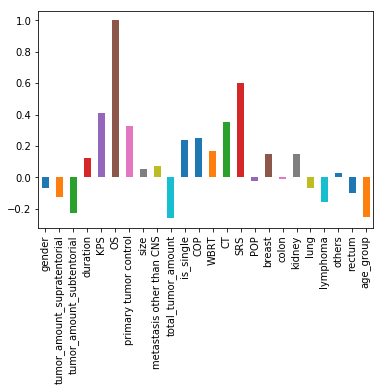

In [49]:
# Draw a bar graph to show correlation coefficients between different factors and overall survival time.
data_dead.corr()['OS'].plot(kind='bar')

- <u>**From the paragraph shown above, we can deduce that KPS>=70, primary tumor undercontrol, single metastasis, COP(complete tumor resection), SRS(stereotactic radiotherapy), breast cancer and kidney cancer are associated with prolonged survival time. Total tumor amount, lymphoma, age > 65 are associated with shorten survival time.**</u> 

In the next few blocks, we try to divide the OS data into different groups according to the factors which have a strong association with OS.

In [50]:
# KPS groups
data_dead.groupby('KPS')['OS'].describe()

,count,mean,std,min,25%,50%,75%,max
KPS,,,,,,,,
0,20.0,3.085,3.288941,0.2,0.500,1.5,5.25,12.0
1,50.0,10.110,8.240820,1.0,3.625,9.0,13.75,36.0


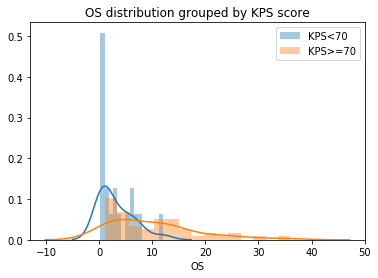

In [51]:
sns.distplot(data_dead[data_dead['KPS'] == 0]['OS'],bins=15)
sns.distplot(data_dead[data_dead['KPS']== 1]['OS'],bins=15)
plt.title('OS distribution grouped by KPS score')
plt.legend(['KPS<70','KPS>=70'])

<u>**See, patients with KPS >= 70live longer. **</u>

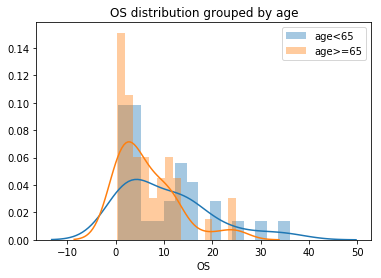

In [52]:
sns.distplot(data_dead[data_dead['age_group'] == 0]['OS'],bins=15)
sns.distplot(data_dead[data_dead['age_group']== 1]['OS'],bins=15)
plt.title('OS distribution grouped by age')
plt.legend(['age<65','age>=65'])

The effect of age seems to be not so abvious.

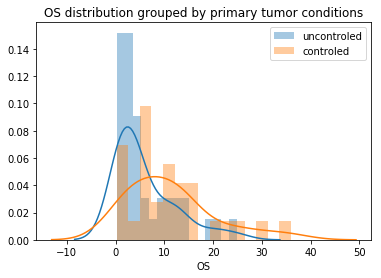

In [53]:
sns.distplot(data_dead[data_dead['primary tumor control'] == 0]['OS'],bins=15)
sns.distplot(data_dead[data_dead['primary tumor control']== 1]['OS'],bins=15)
plt.title('OS distribution grouped by primary tumor conditions')
plt.legend(['uncontroled','controled'])

<u>**Because there are multiple bottleneck restrictions that constraint the length of survival time(At least two, one is the primary tumor, the other is the brain metastasis.).So primary tumor control show its importance at improve the prognosis.**</u>

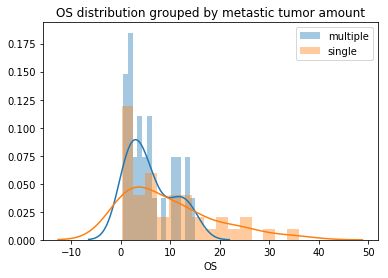

In [54]:
sns.distplot(data_dead[data_dead['is_single'] == 0]['OS'],bins=15)
sns.distplot(data_dead[data_dead['is_single']== 1]['OS'],bins=15)
plt.title('OS distribution grouped by metastic tumor amount')
plt.legend(['multiple','single'])

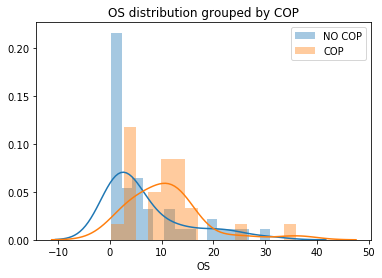

In [55]:
sns.distplot(data_dead[data_dead['COP'] == 0]['OS'],bins=15)
sns.distplot(data_dead[data_dead['COP']== 1]['OS'],bins=15)
plt.title('OS distribution grouped by COP')
plt.legend(['NO COP','COP'])

<u>**After all, total intracranial tumor resection is a quite efficient methold to treat this disease. But not all of the patients have the opportunity to go under COP dut to a varity of reasons, such as poor general body condition, aggressive primary tumor , etc.**</u>

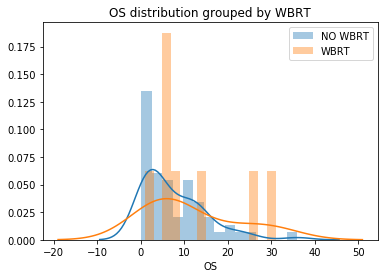

In [56]:
sns.distplot(data_dead[data_dead['WBRT'] == 0]['OS'],bins=15)
sns.distplot(data_dead[data_dead['WBRT']== 1]['OS'],bins=15)
plt.title('OS distribution grouped by WBRT')
plt.legend(['NO WBRT','WBRT'])

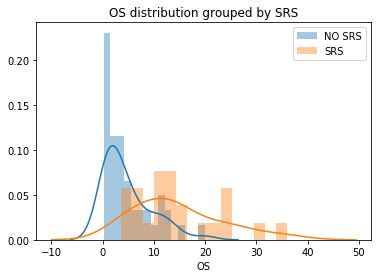

In [57]:
sns.distplot(data_dead[data_dead['SRS'] == 0]['OS'],bins=15)
sns.distplot(data_dead[data_dead['SRS']== 1]['OS'],bins=15)
plt.title('OS distribution grouped by SRS')
plt.legend(['NO SRS','SRS'])

<u>**While SRS seems to be a quite effective way as a replacement of tumor resection.**</u>

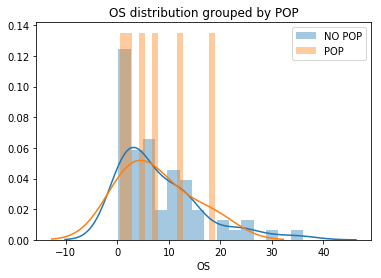

In [58]:
sns.distplot(data_dead[data_dead['POP'] == 0]['OS'],bins=15)
sns.distplot(data_dead[data_dead['POP']== 1]['OS'],bins=15)
plt.title('OS distribution grouped by POP')
plt.legend(['NO POP','POP'])

<u>**While POP seems to have limited benefits. Once the patients determine to accept tumor resection, all the neurosurgeons surely want to resect the tumor completely. If only partial resection can be achieved, there must be some reasons. For example, the tumor's location is in some functional area, so that total resection may cause sever disability; the tumor is multiple, doctors can not resect them all. So that's why according to NCCN guildline, if the tumor can not be totally resected, operation is not suggested. **</u>

C:\Users\freat\AppData\Local\conda\conda\envs\dog-project\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


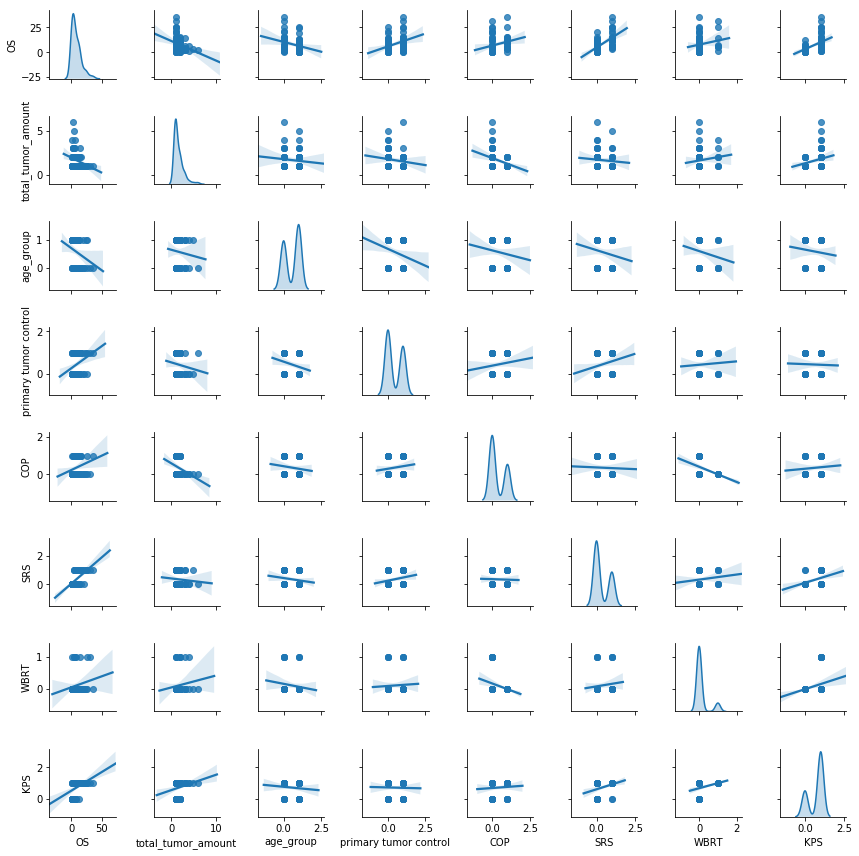

In [59]:
sns.pairplot(data_dead[['OS','total_tumor_amount','age_group','primary tumor control','COP','SRS','WBRT','KPS']],kind='reg',diag_kind='kde',size=1.5)

After all,I plot the pair-fit results, you can find more information if you want.

#### Question 3: Can we build a model using these clinical data to predict overall survival time?

In [60]:
import sklearn

In [61]:
data_dead.columns

Index(['gender', 'tumor_amount_supratentorial', 'tumor_amount_subtentorial',
       'duration', 'KPS', 'OS', 'primary tumor control', 'size',
       'metastasis other than CNS', 'total_tumor_amount', 'is_single', 'COP',
       'WBRT', 'CT', 'SRS', 'POP', 'breast', 'colon', 'kidney', 'lung',
       'lymphoma', 'others', 'rectum', 'age_group'],
      dtype='object')

In [62]:
#prepare the train dataset
from sklearn.preprocessing import StandardScaler
xcols = ['KPS','primary tumor control','size','metastasis other than CNS','total_tumor_amount','COP','WBRT','CT','SRS','breast','kidney','lung','lymphoma','age_group']
scaler = StandardScaler()
X = scaler.fit_transform(data_dead[xcols])
y = data_dead['OS']

In [63]:
# According the analysis above ,the risk factor have a issue of multicolinearity.
# So I chose Lasso regression to decrease the impact of colinearity.
from sklearn.linear_model import LassoCV
#Create a geometric progression to restore possible coefficient alpha
lasso_alphas = np.logspace(-3,0,100,base =10)
# Use LassoCV to do cross validation to filtrate the best alpha.
lcv= LassoCV(alphas=lasso_alphas, cv=10)
lcv.fit(X, y)

LassoCV(alphas=array([0.001  , 0.00107, ..., 0.9326 , 1.     ]), copy_X=True,
    cv=10, eps=0.001, fit_intercept=True, max_iter=1000, n_alphas=100,
    n_jobs=1, normalize=False, positive=False, precompute='auto',
    random_state=None, selection='cyclic', tol=0.0001, verbose=False)

In [64]:
print ('The best alpha is {}'.format(lcv.alpha_))

The best alpha is 0.4641588833612782


In [65]:
print ('The R square is {}'.format(lcv.score(X, y)))

The R square is 0.5802878358286337


In [66]:
#print the final regression model's coefficients.
lcv.coef_

array([ 1.72899589,  0.84367187,  0.        ,  0.        , -1.46599316,
        0.6710009 ,  0.20144078,  0.75594423,  3.0653115 , -0.        ,
        0.        ,  0.08538205, -0.59452606, -0.60529253])

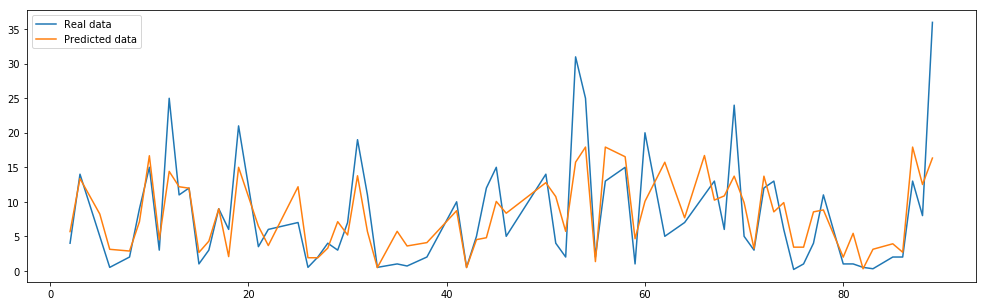

In [67]:
# Plot a picture,to see the difference between the raw and the predicted OS.
plt.figure(figsize=(17,5))
plt.plot(data_dead.index, data_dead.OS)
plt.plot(data_dead.index, lcv.predict(X))
plt.legend(['Real data','Predicted data'])
plt.show()

## 5. Results

- From the analysis done above, we can conclude that:
 > Brain metastasis is quite terrible disease with a median survival time of just 6 months.
 
 > Most patients are around 60 years old when the onset of illness.
 
 > Lung cancer is the most frequent tumor that cause brain metastasis and counts for 60% of all cases.
 
 > The required time for lung cancer to generate metastasis is so short that quite a lot of people even don't know they have gotten a system caner when they find the metastasis.
 
 > A larger KPS score, primary tumor undercontrol,single metastasis are associated with prolonged survival time.
 
 > Complete tumor resection and stereotactic radiotherapy are both effective way to treat this disease, but because of the servity of the illness, the therapeutic effect are quite limited.

## 6. Deploy

Here, I try to build a predictive model using lasso linear regression. The final $R^2$ is 0.58. I think it's not good enough to be deployed clinically. But this result is in line with forecast. After all, brain metastasis is a quite complicated disease. We have to collect more patients' data, more details of the disease. So we can build a more precise model to predict the OS and the benefit of the treatments.